In [2]:
import numpy as np
import pandas as pd
import unicodedata
import re
import matplotlib as plt
import seaborn as sns
import nltk 

# Uncomment to see full cell text
pd.set_option('display.max_colwidth', 0)

In [3]:
raw = pd.read_excel("../data/raw/inquire-boulder-faq-text/inquire-boulder-active-faqs-2019-01-02.xls.xlsx")

In [3]:
raw.describe()

,Topic,Category,Department,FAQ,Active,Updated
count,254,254,254,250,254,254
unique,254,37,19,250,1,133
top,Homelessness and Homeless Services,Transportation,Public Works,"If you are wanting to host a block party, please download an application and fill it out. If you have any questions on your application process, please call 303-441-1936.",Yes,2016-11-22 00:00:00
freq,1,26,69,1,254,13
first,NaN,NaN,NaN,NaN,NaN,2013-06-15 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2019-01-02 00:00:00


In [4]:
df = raw.set_index(keys=['Department', 'Category', 'Topic']).sort_index().drop(labels=('Active'), axis=1).dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 250 entries, (City Attorney , Legal, Birth and Death Certificate Request) to (Public Works , Website, Boulder Measures)
Data columns (total 2 columns):
FAQ        250 non-null object
Updated    250 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 7.5+ KB


In [4]:
faq = raw.drop(labels=('Active'), axis=1).dropna()

In [7]:
faq['length'] = faq.FAQ.apply(len)

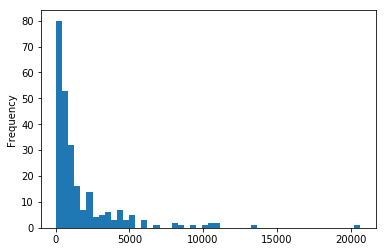

In [8]:
faq.length.plot(kind='hist', bins=50)

In [5]:
def process_text(entry):
    entry = entry.replace('\n', ' ')
    entry = unicodedata.normalize("NFKD", entry)
    entry = entry.replace('.', '. ')
    entry = entry.replace('?', '? ')
    return entry + ' '

def find_heading(row):
    entry = row['FAQ']
    if entry.find('?') < 0:
        return entry
    q = entry.split('?')[0].split('. ')[-1]
    heading = entry.split(q)[0]
    return heading

def strip_heading(row):
    return row['FAQ'].replace(row['heading'], '')

def find_questions(entry):
    questions = []
    qna = entry.split('?')
    for x in qna:
        if x.find('. ') < 0:
            q = x
        else:
            q = x.split('. ')[-1]
        if not q.isspace() and q:
            questions.append(q.strip())
    return questions

def find_answers(entry):
    answers = []
    a = ''
    qna = entry.split('?')
    for x in qna:
        if x.find('. ') < 0:
            continue
        else:
            a = x.replace(x.split('. ')[-1], '')
        if not a.isspace() and a:
                answers.append(a.strip())
    return answers

In [6]:
faq.FAQ = faq.FAQ.apply(process_text)
faq['heading'] = faq.apply(find_heading, axis=1)
faq['FAQ'] = faq.apply(strip_heading, axis=1)

In [7]:
faq['questions'] = faq.FAQ.apply(find_questions)
faq['answers'] = faq.FAQ.apply(find_answers)

In [8]:
raw.iloc[43].FAQ

"I have been injured, or my property has been damaged, by a City of Boulder employee or by city-owned property. What do I do now?Learn about filing Claims Against the City. Colorado law requires you to file a written notice of claim with the Boulder City Attorney's Office before you can file a lawsuit against the City of Boulder. I have a question about a claim I have already filed against the city. Who do I contact? Cannon Cochran Management Services (CCMSI) for City of BoulderPhone: (303) 804-2018 Fax: (970)484-1613cityofboulder@ccmsi.comP.O. Box 4998Greenwood Village, CO 80155How long do I have to file a claim against the city? Colorado state statute allows 180 days from the date of loss.Do I need to hire an attorney to file a claim against the city? While you are welcome to hire a private attorney and the city will be glad to work with your representative, a private attorney is not necessary to file a claim. What about my insurance company? How do they fit in with this claims proce

In [149]:
def count_qna(row):
    #print('%d:\t%d\t%d' % (row.name, len(row.questions), len(row.answers)))
    return abs(len(row.questions) - len(row.answers))
s = faq.apply(count_qna, axis=1)
s.sum()

In [ ]:
def reform(row):
    

In [179]:
faq.iloc[43].FAQ

" What do I do now? Learn about filing Claims Against the City.  Colorado law requires you to file a written notice of claim with the Boulder City Attorney's Office before you can file a lawsuit against the City of Boulder.  I have a question about a claim I have already filed against the city.  Who do I contact?  Cannon Cochran Management Services (CCMSI) for City of BoulderPhone: (303) 804-2018 Fax: (970)484-1613cityofboulder@ccmsi. comP. O.  Box 4998Greenwood Village, CO 80155How long do I have to file a claim against the city?  Colorado state statute allows 180 days from the date of loss. Do I need to hire an attorney to file a claim against the city?  While you are welcome to hire a private attorney and the city will be glad to work with your representative, a private attorney is not necessary to file a claim.  What about my insurance company?  How do they fit in with this claims process?  If you have made a claim with your insurance company for repair of damaged property, your in

In [17]:
match = re.findall(r'([^.]+\?\s)([^?]+(?:\.\s|\w(?=[A-Z])))', faq.iloc[43].FAQ)
if(match):
    for s in match:
        print('-----------------')
        print(s[0][:])
        print('****')
        print(s[1][:])
else:
    print('none')

-----------------
 What do I do now? 
****
Learn about filing Claims Against the City.  Colorado law requires you to file a written notice of claim with the Boulder City Attorney's Office before you can file a lawsuit against the City of Boulder.  I have a question about a claim I have already filed against the city. 
-----------------
 Who do I contact? 
****
 Cannon Cochran Management Services (CCMSI) for City of BoulderPhone: (303) 804-2018 Fax: (970)484-1613cityofboulder@ccmsi. comP. O.  Box 4998Greenwood Village, CO 80155
-----------------
How long do I have to file a claim against the city? 
****
 Colorado state statute allows 180 days from the date of loss. 
-----------------
Do I need to hire an attorney to file a claim against the city? 
****
 While you are welcome to hire a private attorney and the city will be glad to work with your representative, a private attorney is not necessary to file a claim. 
-----------------
 What about my insurance company?  How do they fit in wi

## NLP

In [14]:
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [15]:
def text_process(text):
    # Remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Remove stopwords
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [39]:
faq['FAQ'].head().apply(text_process)

0    [city, boulder, committed, making, housing, community, available, variety, people, including, could, otherwise, purchase, home, boulders, housing, market, division, housing, offers, opportunities, homeownership, low, moderate, incomes, payment, assistance, market, rate, homes, homes, must, sold, affordable, prices, long, take, become, incomecertifiedgenerally, two, weeks, needs, applicationeveryone, lives, household, part, household, addition, people, listed, property, title, household, members, include, individuals, legal, spouse, domestic, partner, commonlaw, spouse, childrenunder, 18, reside, applicant, least, 50, percent, time, andor, significant, applicant, chooses, include, member, hisher, household, occupying, house, applicants, spouse, must, included, unless, legally, divorced, separated, persons, counted, include, foster, children, unborn, children, children, 18, reside, applicant, less, ...]                                                                             
1  

In [40]:
# Might take a while...
bow_transformer = CountVectorizer(analyzer=text_process).fit(faq.FAQ)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

7054


In [41]:
# Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:
entry = faq['FAQ'][0]
print(entry)

The City of Boulder is committed to making housing in our community available to a variety of people, including those who could not otherwise purchase a home in Boulder's housing market. The Division of Housing offers opportunities for homeownership to those with low and moderate incomes - from down payment assistance on market rate homes to homes that must be sold at affordable prices. How long does it take to become income-certified?Generally up to two weeks. Who needs to be on the application?Everyone who lives in the household or is part of the household, in addition to all people who will be listed on the property title. Household members should include all individuals: legal spouse, domestic partner, or common-law spouse; children(under 18 who reside with the applicant at least 50 percent of the time; and/or a significant other whom the applicant chooses to include as a member of his/her household, who will be occupying the house. The applicant's spouse must be included unless th

In [42]:
# Now let's see its vector representation:
bow = bow_transformer.transform([entry])
print(bow)
print(bow.shape)

  (0, 26)	1
  (0, 37)	1
  (0, 47)	1
  (0, 61)	3
  (0, 86)	1
  (0, 87)	1
  (0, 147)	1
  (0, 165)	1
  (0, 218)	1
  (0, 319)	2
  (0, 538)	1
  (0, 542)	1
  (0, 608)	5
  (0, 614)	1
  (0, 665)	1
  (0, 672)	1
  (0, 673)	1
  (0, 711)	1
  (0, 728)	3
  (0, 737)	1
  (0, 754)	1
  (0, 757)	4
  (0, 758)	1
  (0, 760)	1
  (0, 762)	1
  :	:
  (0, 6098)	1
  (0, 6185)	2
  (0, 6189)	1
  (0, 6198)	1
  (0, 6277)	1
  (0, 6393)	3
  (0, 6417)	2
  (0, 6428)	2
  (0, 6432)	1
  (0, 6451)	1
  (0, 6567)	1
  (0, 6583)	1
  (0, 6624)	2
  (0, 6656)	1
  (0, 6666)	1
  (0, 6703)	1
  (0, 6716)	1
  (0, 6738)	1
  (0, 6739)	1
  (0, 6740)	1
  (0, 6784)	1
  (0, 6809)	1
  (0, 6865)	1
  (0, 6877)	1
  (0, 7005)	3
(1, 7054)


This means that there are 8 unique words in message number 0 (after removing common stop words). One of them appears twice, the rest only once. Let's go ahead and check and confirm which one appears twice:

In [44]:
print(bow_transformer.get_feature_names()[7005])

years


Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame. Let's go ahead and check out how the bag-of-words counts for the entire FAQ corpus is a large, sparse matrix:

In [45]:
faq_bow = bow_transformer.transform(faq['FAQ'])
print('Shape of Sparse Matrix: ', faq_bow.shape)
print('Amount of Non-Zero occurences: ', faq_bow.nnz)

Shape of Sparse Matrix:  (250, 7054)
Amount of Non-Zero occurences:  24520


In [46]:
sparsity = (100.0 * faq_bow.nnz / (faq_bow.shape[0] * faq_bow.shape[1]))
print('sparsity: {}% Non-zero values'.format(round(sparsity)))

sparsity: 1% Non-zero values


In [47]:
tfidf_transformer = TfidfTransformer().fit(faq_bow)
tfidf = tfidf_transformer.transform(bow)
print(tfidf)

  (0, 7005)	0.09582936818073878
  (0, 6877)	0.03681836557246331
  (0, 6865)	0.024657504319853925
  (0, 6809)	0.05202494620510897
  (0, 6784)	0.020971819727887548
  (0, 6740)	0.04584198079252669
  (0, 6739)	0.04584198079252669
  (0, 6738)	0.05202494620510897
  (0, 6716)	0.03405174219430081
  (0, 6703)	0.04222517788291014
  (0, 6666)	0.029145255416496887
  (0, 6656)	0.043851510516499624
  (0, 6624)	0.06695209993472429
  (0, 6583)	0.05202494620510897
  (0, 6567)	0.029145255416496887
  (0, 6451)	0.04222517788291014
  (0, 6432)	0.04840814329549242
  (0, 6428)	0.09168396158505338
  (0, 6417)	0.04525128247702502
  (0, 6393)	0.09582936818073878
  (0, 6277)	0.029145255416496887
  (0, 6198)	0.04840814329549242
  (0, 6189)	0.039659015379944415
  (0, 6185)	0.05515257436685294
  (0, 6098)	0.04840814329549242
  :	:
  (0, 762)	0.05202494620510897
  (0, 760)	0.026752304832442845
  (0, 758)	0.03532822082907916
  (0, 757)	0.1506741804156694
  (0, 754)	0.043851510516499624
  (0, 737)	0.04840814329549242


In [48]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['boulder']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['county']])

1.2221480310727082
2.861891293002137


In [49]:
faq_tfidf = tfidf_transformer.transform(faq_bow)
print(faq_tfidf.shape)

(250, 7054)


### Train the model

In [50]:
from sklearn.naive_bayes import MultinomialNB
faq_match_model = MultinomialNB().fit(faq_tfidf, faq['Topic'])

In [51]:
print('predicted:', faq_match_model.predict(tfidf)[0])
print('expected:', faq.Topic[0])

predicted: Affordable Homeownership
expected: Affordable Homeownership


### Evaluate the model

In [58]:
pred = faq_match_model.predict(faq_tfidf)
print(pred)

['Affordable Homeownership' 'Affordable Rental Opportunities'
 'Aircraft Noise' 'Airport' 'Alley Maintenance'
 'Americans for the Arts Convention Scholarships'
 'Americans with Disabilities Act (ADA)'
 'Americans with Disabilities Act (ADA) Trails'
 'Animal Noise (Barking Dogs)' 'Animal Protection, Rules and Regulations'
 'Animal Shelter' 'Ask-a-Librarian' 'Auction Licensing Instructions'
 'Backflow Prevention - Drinking Water'
 'Bear Resistant Container Required' 'Bears' 'Bicycling'
 'Birth and Death Certificate Request' 'Block Party'
 'Boulder Arts Commission Grants' 'Boulder City Limits'
 'Boulder Civic Area' 'Boulder Convention and Visitors Bureau'
 'Boulder Measures' 'Boulder Office of Emergency Management'
 'Boulder Planning' 'Boulder Reservoir' 'Boulder Revised Code'
 'BoulderReads!' 'Broken Parking Meter or Pay Station' 'Building Permits'
 'Building Safety Code Violations' 'Bulk Water Sales'
 'Business Licensing Questions' 'Business Services'
 'Canyon Gallery and Art Exhibit Sp

In [59]:
from sklearn.metrics import classification_report
print (classification_report(faq['Topic'], pred))

                                                                      precision    recall  f1-score   support

                                                  Accessible Parking       1.00      1.00      1.00         1
                                            Affordable Homeownership       1.00      1.00      1.00         1
                                     Affordable Rental Opportunities       1.00      1.00      1.00         1
                                                      Aircraft Noise       1.00      1.00      1.00         1
                                                             Airport       1.00      1.00      1.00         1
                                                   Alley Maintenance       1.00      1.00      1.00         1
                      Americans for the Arts Convention Scholarships       1.00      1.00      1.00         1
                               Americans with Disabilities Act (ADA)       1.00      1.00      1.00         1
         

In [60]:
from sklearn.model_selection import train_test_split

faq_train, faq_test, topic_train, topic_test = \
train_test_split(faq['FAQ'], faq['Topic'], test_size=0.2)

print(len(faq_train), len(faq_test), len(faq_train) + len(faq_test))

200 50 250


In [86]:
from sklearn.pipeline import Pipeline

tfidf_transformer = TfidfTransformer().fit(faq_bow)

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', tfidf_transformer),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [87]:
pipeline.fit(faq_train,topic_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1166e5ea0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [88]:
pred = pipeline.predict(faq_test)

In [113]:
#print(classification_report(pred, faq_test))